Exploratory Data Analysis 
=====

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from sklearn.metrics import classification_report

from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Conv1D, Conv2D, Flatten, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from keras import optimizers

np.random.seed(0)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

#PW: added warning ignore
import warnings
warnings.filterwarnings('ignore')
import time

Using TensorFlow backend.


In [2]:
# Here we extract the data files (NOTE: please enter data path)
#path_train = 'C:/Users/wang_/Dropbox/PAULINE/Berkeley_MIDS/W207_Applied_ML/Project_Facial/training.csv'
#path_test = 'C:/Users/wang_/Dropbox/PAULINE/Berkeley_MIDS/W207_Applied_ML/Project_Facial/test.csv'

path_train = 'training.csv'
path_test = 'test.csv'

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

New addition: Let's read in the augmented training data from face_recognition 

In [3]:
path_augmented_train = 'edited_labels_v2.csv'
df_augmented = pd.read_csv(path_augmented_train)

In [4]:
# Taking a look at the first five rows of the training data
df_train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


New addition: df_augmented is the same as df_train index. 
Add in the column of Image 

In [5]:
print(df_augmented.shape)

(7049, 30)


In [6]:
print(df_train.shape)

(7049, 31)


In [7]:
df_augmented['Image']=df_train['Image']

In [8]:
df_augmented.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


Plot a few just for sanity sake to make sure I didn't goof when making the coordinates...
--------

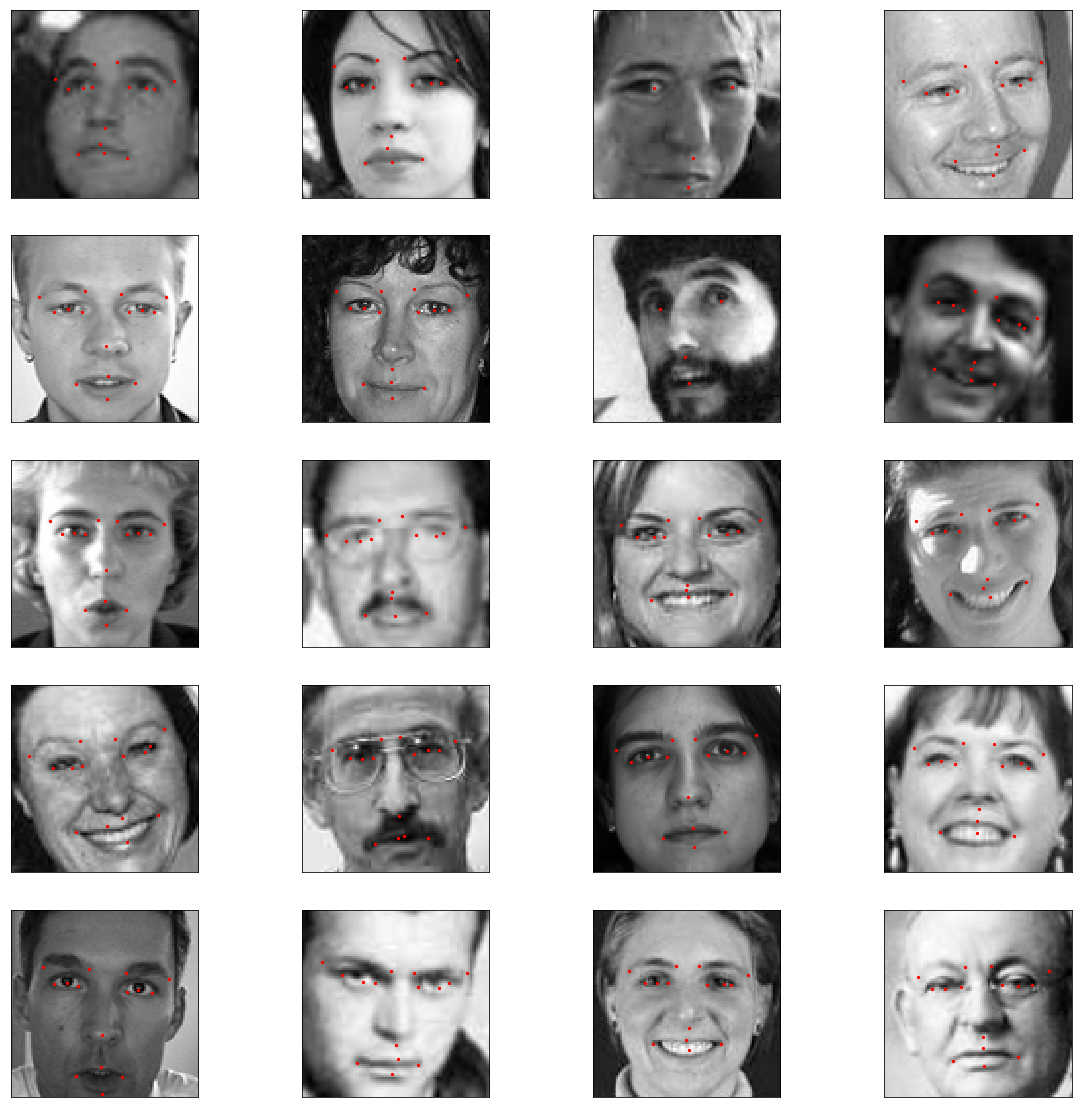

In [19]:
position = 1

fig = plt.figure(figsize = (20, 20))

random_list = np.random.choice(list(df_augmented.index), 20, replace=False) 

plot_augment = df_augmented.loc[:,'Image'].T
plot_augment = plot_augment.astype(str) 
plot_augment = plot_augment.str.split(" ", expand=True)

labels_aug_only = df_augmented.loc[:,'left_eye_center_x':'mouth_center_bottom_lip_y']

for index in list(random_list): 
    sub = fig.add_subplot(5,4,position)
    plt.imshow(np.reshape(np.array(plot_augment.iloc[index,:].astype(int)), (96, 96)), cmap = 'gray')
    
    for coord in range(0, labels_aug_only.iloc[index,:].shape[0]-1, 2):
        if coord == None:
            continue
        else:
            plt.gca().scatter(labels_aug_only.iloc[index,coord], labels_aug_only.iloc[index,coord+1], c = 'red', s = 5)

    sub.set_xticks([])
    sub.set_yticks([])
    
    position += 1

plt.show()   

# Not horrendous but the mouth area could use some work...



We note from above that the pixel values are all squeezed into the last column and the labels are split in x- and y-coordinates (alternating) in the columns before. We next transform this data to get one dataset with only the pixel values, with each pixel being in one column.

In [20]:
# Processing training data such that each pixel has its own column and is seperated from the labels
kaggle_train = df_train.loc[:,'Image'].T
kaggle_train = kaggle_train.astype(str)
kaggle_train = kaggle_train.str.split(" ", expand = True) 
kaggle_train.head()

,0,1,2,3,4,5,6,7,8,9,...,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
0,238,236,237,238,240,240,239,241,241,243,...,33,29,30,34,39,49,62,70,75,90
1,219,215,204,196,204,211,212,200,180,168,...,1,1,1,1,1,1,1,1,1,1
2,144,142,159,180,188,188,184,180,167,132,...,64,60,56,61,70,69,71,78,78,77
3,193,192,193,194,194,194,193,192,168,111,...,1,1,1,1,1,1,1,1,1,1
4,147,148,160,196,215,214,216,217,219,220,...,33,34,37,37,43,46,83,140,170,176


In [21]:
# Creates labels for facial feature position
labels = df_train.iloc[:, 0:30] 
labels.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

We also preprocess the test data (similarly, the pixel values are squeezed in the last column and the first column represents the test ID.

In [22]:
# processing test data such that each pixel has its own column,
# merging it then with the ImageId column
image_test = df_test.loc[:,'Image'].T
image_test = image_test.astype(str)
image_test = image_test.str.split(" ", expand = True)
kaggle_test = pd.DataFrame(df_test.loc[:,'ImageId']).join(image_test)
kaggle_test.head()

,ImageId,0,1,2,3,4,5,6,7,8,...,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
0,1,182,183,182,182,180,180,176,169,156,...,6,14,28,28,24,18,12,8,5,5
1,2,76,87,81,72,65,59,64,76,69,...,156,152,162,169,168,159,191,228,211,168
2,3,177,176,174,170,169,169,168,166,166,...,1,1,1,1,1,1,1,1,1,1
3,4,176,174,174,175,174,174,176,176,175,...,144,143,141,142,143,142,142,142,142,140
4,5,50,47,44,101,144,149,120,58,48,...,254,254,254,253,255,236,174,175,175,165


## Baseline Model##

In this section, we illustrate classifying facial key points using a simple neural network model with no hidden layer as our baseline model. The purpose of the baseline model is to compare and contrast the improvement of classifer with our data augumentation and feature engineering in the subsequent sections.  We will also use the baseline model to evaluate the value of the hidden layers .  

### Data Transfomation
We first drop all the images that contains one or more missing facial keypoint values.  From the EDA section, we identify only 2140 images out of the total 7049 with all 30 facial keypoint intact.  We refer to these images as "High Quality" and will run our baseline CNN model based on this subset of images.  We ran through a list of codes below to transform the data into our desired shape and format. 

In [23]:
# We drop all images with mising value which left us with 2140 images. We examine the shape of the data to make sure that it is correct. 
hq_image = df_train.dropna() 
print(hq_image.shape)

(2140, 31)


In [24]:
def string_image(string):
    """This functions converts a string to a numpy array. This is used to transform the 'Image' column"""
    return np.array([int(item) for item in string.split()]).reshape((96, 96))

In [25]:
#convert the "image" column to 96x96 images for plotting the data later
X = np.stack([string_image(string) for string in hq_image['Image']]).astype(np.float)[:, :, :, np.newaxis]
#convert the rest of the data to 2140 lists with 30 key facial keypoint positions
y = np.vstack(hq_image[hq_image.columns[:-1]].values)

In [26]:
X_train = X / 255.#normalize image pixel to between 0 and 1

Repeat the same but with the augmented set to create X_train_aug

In [27]:
hq_image2 = df_augmented.dropna()
print(hq_image2.shape)
# Now with 6381 rows total

(6381, 31)


In [28]:
#convert the "image" column to 96x96 images for plotting the data later
X_aug = np.stack([string_image(string) for string in hq_image2['Image']]).astype(np.float)[:, :, :, np.newaxis]
#convert the rest of the data to 2140 lists with 30 key facial keypoint positions
y_aug = np.vstack(hq_image2[hq_image2.columns[:-1]].values)

In [29]:
X_train_aug = X_aug / 255. 

### Model Building

We instantiate a sequential model with no hidden layer as our baseline model with most of the default hyperparameters.  We select the activation function, softmax, as it calculates the probabilities of each target class over all possible target classes. The output dimension is 30 as there are 15 pairs of x, y coordinates and the imput dimension is 9216 to represent the 96 x 96 pixels. We then run the optimizer, setting the learning rate to be 0.01 and using 200 epochs, to calculate the accuracy and loss of our baseline model.  

In [30]:
#We first define the metrics of RMSE as our benchmark for model performance
from keras import backend

def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true)))
def r_square(y_true, y_pred):
    SS_res =  backend.sum(backend.square(y_true - y_pred)) 
    SS_tot = backend.sum(backend.square(y_true - backend.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + backend.epsilon()) )

In [31]:
base_model = Sequential()#isntantiate a base sequential model
base_model.add(Dense(30, input_dim=9216, activation="relu")) #set the output, input and activation function. 
base_model.add(Dense(30)) #the output has no activation function so it's a regression problem 

To avoid overfitting to bias from face_recognition, I set aside a set of validation data from the un-augmented (original data)

Note: Instead of validation_split (which would repeatedly sample from the augmented training set), I have to use validation_data. 

Therefore, we fit on the augmented set, and the validation_data = original training data. 

First attempt below 
-----

* Take the 6381 augmented samples and validate on the 2140 original nonNA set. 

Note: This is sort of "cheating" because the 2140 are included in the augmented samples. 

In [33]:
start_time=time.time()
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#base_model.compile(optimizer=sgd, loss='mse', metrics=['mse', r_square, rmse])
base_model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse', r_square, rmse])
epochs = 100

# Note here: instead of validation_split, we use validation_data 
# input and validation must have the same size (augmented as 6381 input samples while validation only has 2140)

history = base_model.fit(X_train_aug.reshape(y_aug.shape[0], -1), y_aug, validation_data=(X_train.reshape(y.shape[0],-1), y), shuffle=True, epochs=epochs, batch_size=20)

total_time=time.time()-start_time
print("The model took {} seconds to run".format(round(total_time,3)))


Train on 6381 samples, validate on 2140 samples
Epoch 1/100
6381/6381 [==============================] - 4s 668us/step - loss: 388.8650 - mean_squared_error: 388.8650 - r_square: -0.1392 - rmse: 18.1412 - val_loss: 312.0480 - val_mean_squared_error: 312.0480 - val_r_square: 0.1150 - val_rmse: 17.5996
Epoch 2/100
6381/6381 [==============================] - 3s 455us/step - loss: 206.9854 - mean_squared_error: 206.9854 - r_square: 0.3923 - rmse: 14.3348 - val_loss: 305.4708 - val_mean_squared_error: 305.4708 - val_r_square: 0.1352 - val_rmse: 17.4238
Epoch 3/100
6381/6381 [==============================] - 3s 445us/step - loss: 190.6035 - mean_squared_error: 190.6035 - r_square: 0.4407 - rmse: 13.7384 - val_loss: 265.4494 - val_mean_squared_error: 265.4494 - val_r_square: 0.2492 - val_rmse: 16.1881
Epoch 4/100
6381/6381 [==============================] - 3s 486us/step - loss: 177.4536 - mean_squared_error: 177.4536 - r_square: 0.4794 - rmse: 13.2516 - val_loss: 216.0435 - val_mean_square

Epoch 66/100
6381/6381 [==============================] - 3s 514us/step - loss: 55.2297 - mean_squared_error: 55.2297 - r_square: 0.8379 - rmse: 7.3405 - val_loss: 79.5239 - val_mean_squared_error: 79.5239 - val_r_square: 0.7779 - val_rmse: 8.2935
Epoch 67/100
6381/6381 [==============================] - 3s 477us/step - loss: 54.3829 - mean_squared_error: 54.3829 - r_square: 0.8405 - rmse: 7.2731 - val_loss: 95.4306 - val_mean_squared_error: 95.4306 - val_r_square: 0.7330 - val_rmse: 9.2162
Epoch 68/100
6381/6381 [==============================] - 3s 501us/step - loss: 54.2616 - mean_squared_error: 54.2616 - r_square: 0.8409 - rmse: 7.2682 - val_loss: 76.4391 - val_mean_squared_error: 76.4391 - val_r_square: 0.7868 - val_rmse: 8.0613
Epoch 69/100
6381/6381 [==============================] - 3s 471us/step - loss: 53.8742 - mean_squared_error: 53.8742 - r_square: 0.8420 - rmse: 7.2474 - val_loss: 81.2848 - val_mean_squared_error: 81.2848 - val_r_square: 0.7732 - val_rmse: 8.2215
Epoch 70

Epoch 99/100
6381/6381 [==============================] - 3s 525us/step - loss: 48.7998 - mean_squared_error: 48.7998 - r_square: 0.8568 - rmse: 6.8652 - val_loss: 97.9324 - val_mean_squared_error: 97.9324 - val_r_square: 0.7261 - val_rmse: 9.3590
Epoch 100/100
6381/6381 [==============================] - 3s 527us/step - loss: 47.7350 - mean_squared_error: 47.7350 - r_square: 0.8599 - rmse: 6.8059 - val_loss: 72.0617 - val_mean_squared_error: 72.0617 - val_r_square: 0.7990 - val_rmse: 7.7020
The model took 343.88 seconds to run


Below are the model performance plots after 100 epoches:


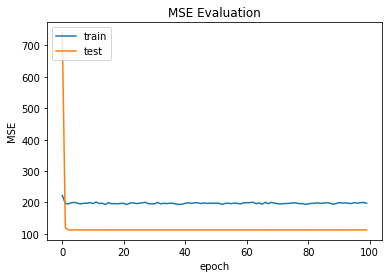

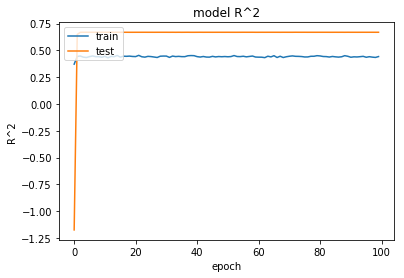

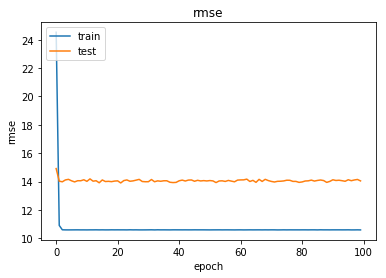

In [23]:
######
# THESE WERE NUMBERS WHEN WE HAD OPTIMIZER = SGD 
#######

print ("Below are the model performance plots after {} epoches:".format(epochs))


# plot training curve for MSE
#plt.ylim(0,25)
#plt.xlim(0,100)
plt.plot(history.history['val_mean_squared_error'])
plt.plot(history.history['mean_squared_error'])
plt.title('MSE Evaluation')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plot training curve for R^2 (beware of scale, starts very low negative)
#plt.ylim(0.8,1.2)
#plt.xlim(0,100)
plt.plot(history.history['val_r_square'])
plt.plot(history.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
           
# plot training curve for rmse
#plt.ylim(0,8)
#plt.xlim(0,100)
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Below are the ADAM optimizer model performance plots after 100 epoches:


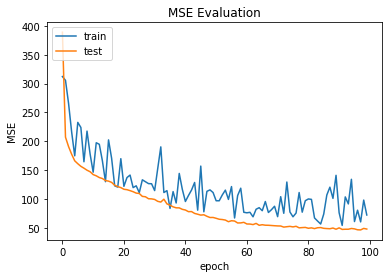

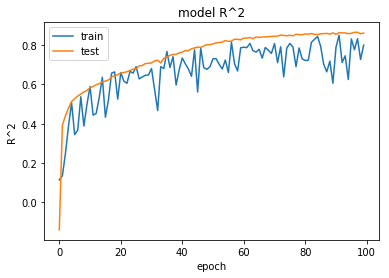

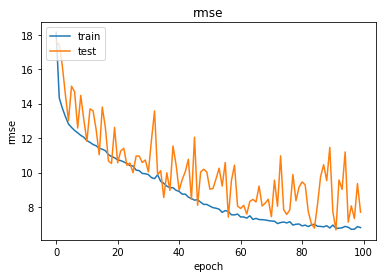

In [34]:
print ("Below are the ADAM optimizer model performance plots after {} epoches:".format(epochs))


# plot training curve for MSE
#plt.ylim(0,25)
#plt.xlim(0,100)
plt.plot(history.history['val_mean_squared_error'])
plt.plot(history.history['mean_squared_error'])
plt.title('MSE Evaluation')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plot training curve for R^2 (beware of scale, starts very low negative)
#plt.ylim(0.8,1.2)
#plt.xlim(0,100)
plt.plot(history.history['val_r_square'])
plt.plot(history.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
           
# plot training curve for rmse
#plt.ylim(0,8)
#plt.xlim(0,100)
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

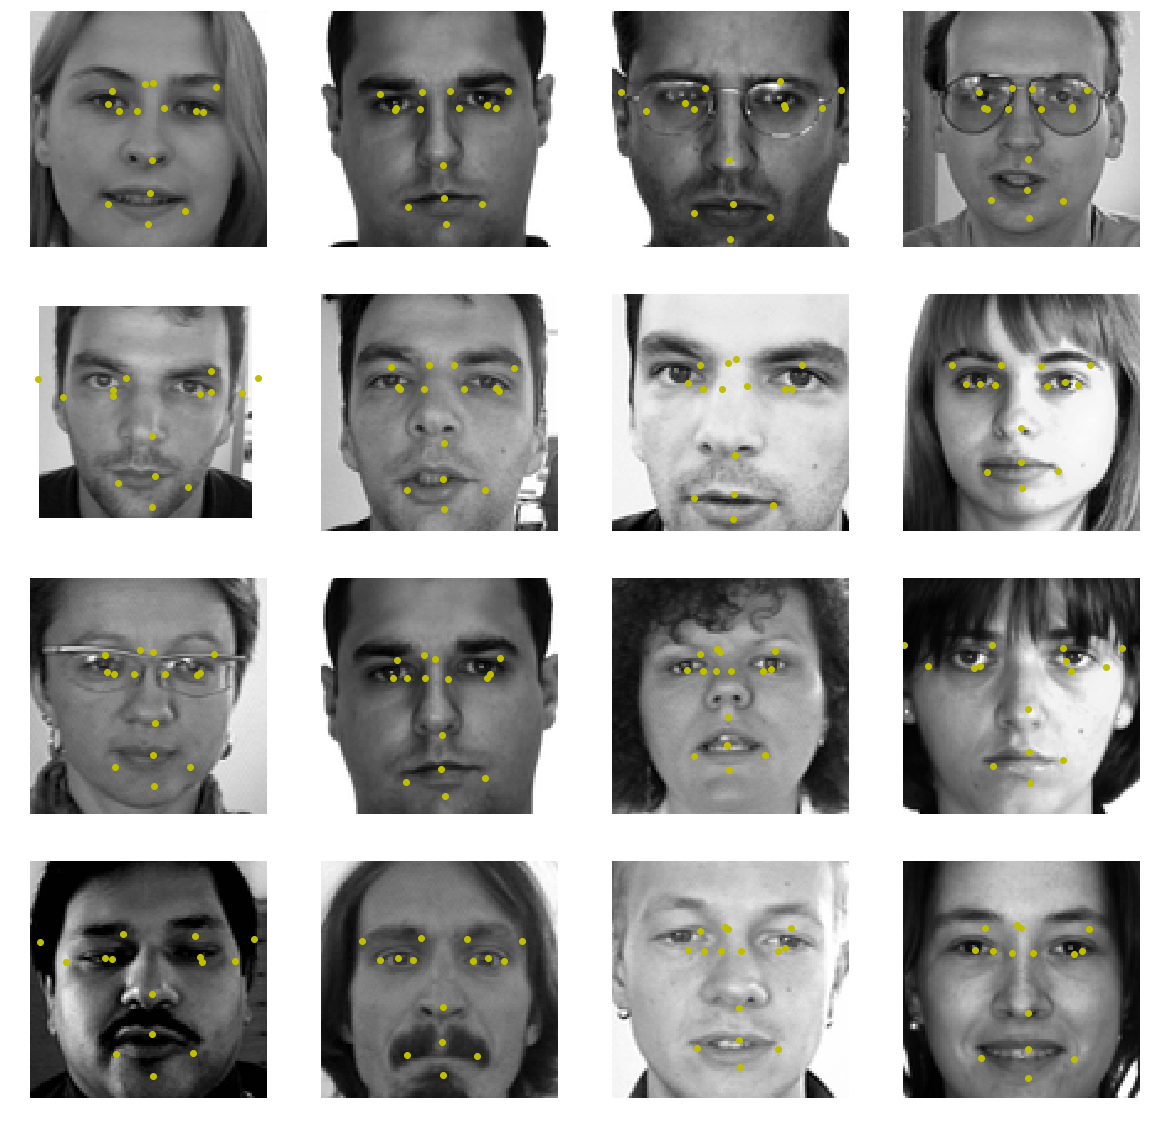

In [35]:
#we plot the prediction with facial images

def plot_faces_with_keypoints_and_predictions(model, nrows=4, ncols=4, model_input='flat'):
    """Plots sampled faces with their predicted labels."""
    selection = np.random.choice(np.arange(X.shape[0]), size=(nrows*ncols), replace=False) #prints a list of random number 
    fig, axes = plt.subplots(figsize=(20, 20), nrows=nrows, ncols=ncols)
    for ind, ax in zip(selection, axes.ravel()):
        img = X_train[ind, :, :, 0]
        if model_input == 'flat':
            predictions = model.predict(img.reshape(1, -1))
        else:
            predictions = model.predict(img[np.newaxis, :, :, np.newaxis])
        xy_predictions=predictions.reshape(15,2)
        ax.imshow(img, cmap='gray')
        ax.plot(xy_predictions[:, 0], xy_predictions[:, 1], 'yo')
        ax.axis('off')
      
plot_faces_with_keypoints_and_predictions(base_model)

Second attempt 
-------

* Drop the 2140 original nonNA examples in the augmented set to avoid 'cheating' (thus left with only 4241)
* validation set is the original 2140 complete set. 

In [36]:
hq_image3=hq_image2.loc[list(set(list(hq_image2.index)) - set(list(hq_image.index))),:]
print(hq_image3.shape)

(4241, 31)


In [37]:
#convert the "image" column to 96x96 images for plotting the data later
X_aug_2 = np.stack([string_image(string) for string in hq_image3['Image']]).astype(np.float)[:, :, :, np.newaxis]
#convert the rest of the data to 2140 lists with 30 key facial keypoint positions
y_aug_2 = np.vstack(hq_image3[hq_image3.columns[:-1]].values)

In [38]:
X_train_aug_2 = X_aug_2 / 255. 

In [39]:
base_model = Sequential()#isntantiate a base sequential model
base_model.add(Dense(30, input_dim=9216, activation="relu")) #set the output, input and activation function. 
base_model.add(Dense(30)) #the output has no activation function so it's a regression problem 

In [40]:
start_time=time.time()
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#base_model.compile(optimizer=sgd, loss='mse', metrics=['mse', r_square, rmse])
base_model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse', r_square, rmse])

# Note here: instead of validation_split, we use validation_data 

history = base_model.fit(X_train_aug_2.reshape(y_aug_2.shape[0], -1), y_aug_2, validation_data=(X_train.reshape(y.shape[0],-1), y), shuffle=True, epochs=epochs, batch_size=20)

total_time=time.time()-start_time
print("The model took {} seconds to run".format(round(total_time,3)))


Train on 4241 samples, validate on 2140 samples
Epoch 1/100
4241/4241 [==============================] - 3s 636us/step - loss: 358.3491 - mean_squared_error: 358.3491 - r_square: -0.0770 - rmse: 16.4995 - val_loss: 556.9417 - val_mean_squared_error: 556.9417 - val_r_square: -0.5765 - val_rmse: 23.5782
Epoch 2/100
4241/4241 [==============================] - 2s 502us/step - loss: 124.6974 - mean_squared_error: 124.6974 - r_square: 0.6258 - rmse: 11.0509 - val_loss: 547.4418 - val_mean_squared_error: 547.4418 - val_r_square: -0.5490 - val_rmse: 23.3777
Epoch 3/100
4241/4241 [==============================] - 2s 532us/step - loss: 117.5541 - mean_squared_error: 117.5541 - r_square: 0.6478 - rmse: 10.7218 - val_loss: 546.8128 - val_mean_squared_error: 546.8128 - val_r_square: -0.5481 - val_rmse: 23.3656
Epoch 4/100
4241/4241 [==============================] - 2s 501us/step - loss: 112.8628 - mean_squared_error: 112.8628 - r_square: 0.6614 - rmse: 10.5127 - val_loss: 544.7356 - val_mean_squ

4241/4241 [==============================] - 3s 606us/step - loss: 37.6324 - mean_squared_error: 37.6324 - r_square: 0.8874 - rmse: 6.0213 - val_loss: 443.8229 - val_mean_squared_error: 443.8229 - val_r_square: -0.2519 - val_rmse: 21.0496
Epoch 66/100
4241/4241 [==============================] - 2s 526us/step - loss: 34.1662 - mean_squared_error: 34.1662 - r_square: 0.8976 - rmse: 5.7495 - val_loss: 442.4805 - val_mean_squared_error: 442.4805 - val_r_square: -0.2479 - val_rmse: 21.0158
Epoch 67/100
4241/4241 [==============================] - 2s 499us/step - loss: 32.9391 - mean_squared_error: 32.9391 - r_square: 0.9012 - rmse: 5.6308 - val_loss: 433.0128 - val_mean_squared_error: 433.0128 - val_r_square: -0.2222 - val_rmse: 20.7986
Epoch 68/100
4241/4241 [==============================] - 2s 499us/step - loss: 31.2620 - mean_squared_error: 31.2620 - r_square: 0.9063 - rmse: 5.4889 - val_loss: 453.5938 - val_mean_squared_error: 453.5938 - val_r_square: -0.2793 - val_rmse: 21.2788
Epoch

Below are the model performance plots after 100 epoches:


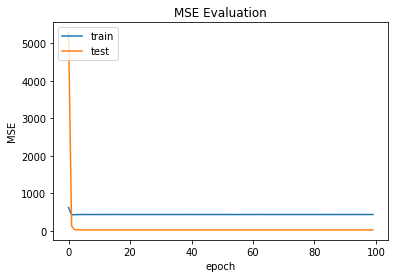

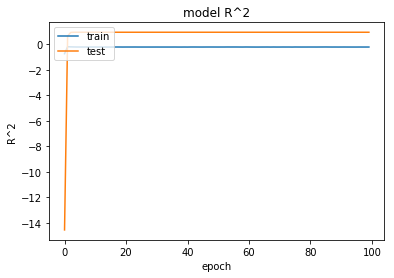

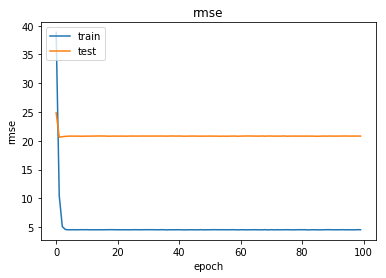

In [30]:
######### 
# BELOW ARE THE NUMBERS WHEN OPTIMIZER = SGD 
########

print ("Below are the model performance plots after {} epoches:".format(epochs))


# plot training curve for MSE
#plt.ylim(0,25)
#plt.xlim(0,100)
plt.plot(history.history['val_mean_squared_error'])
plt.plot(history.history['mean_squared_error'])
plt.title('MSE Evaluation')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plot training curve for R^2 (beware of scale, starts very low negative)
#plt.ylim(0.8,1.2)
#plt.xlim(0,100)
plt.plot(history.history['val_r_square'])
plt.plot(history.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
           
# plot training curve for rmse
#plt.ylim(0,8)
#plt.xlim(0,100)
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Below are the ADAM optimizer model performance plots after 100 epoches:


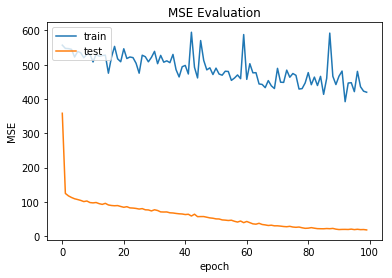

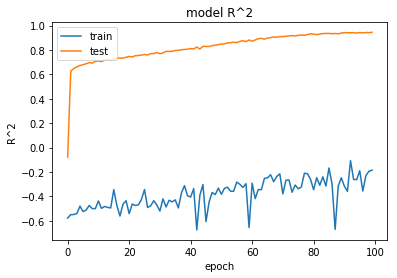

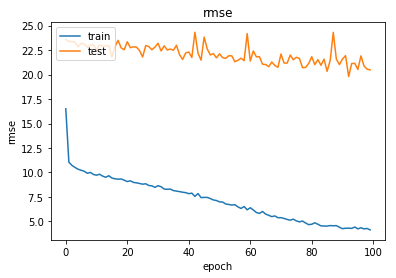

In [41]:
print ("Below are the ADAM optimizer model performance plots after {} epoches:".format(epochs))


# plot training curve for MSE
#plt.ylim(0,25)
#plt.xlim(0,100)
plt.plot(history.history['val_mean_squared_error'])
plt.plot(history.history['mean_squared_error'])
plt.title('MSE Evaluation')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plot training curve for R^2 (beware of scale, starts very low negative)
#plt.ylim(0.8,1.2)
#plt.xlim(0,100)
plt.plot(history.history['val_r_square'])
plt.plot(history.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
           
# plot training curve for rmse
#plt.ylim(0,8)
#plt.xlim(0,100)
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

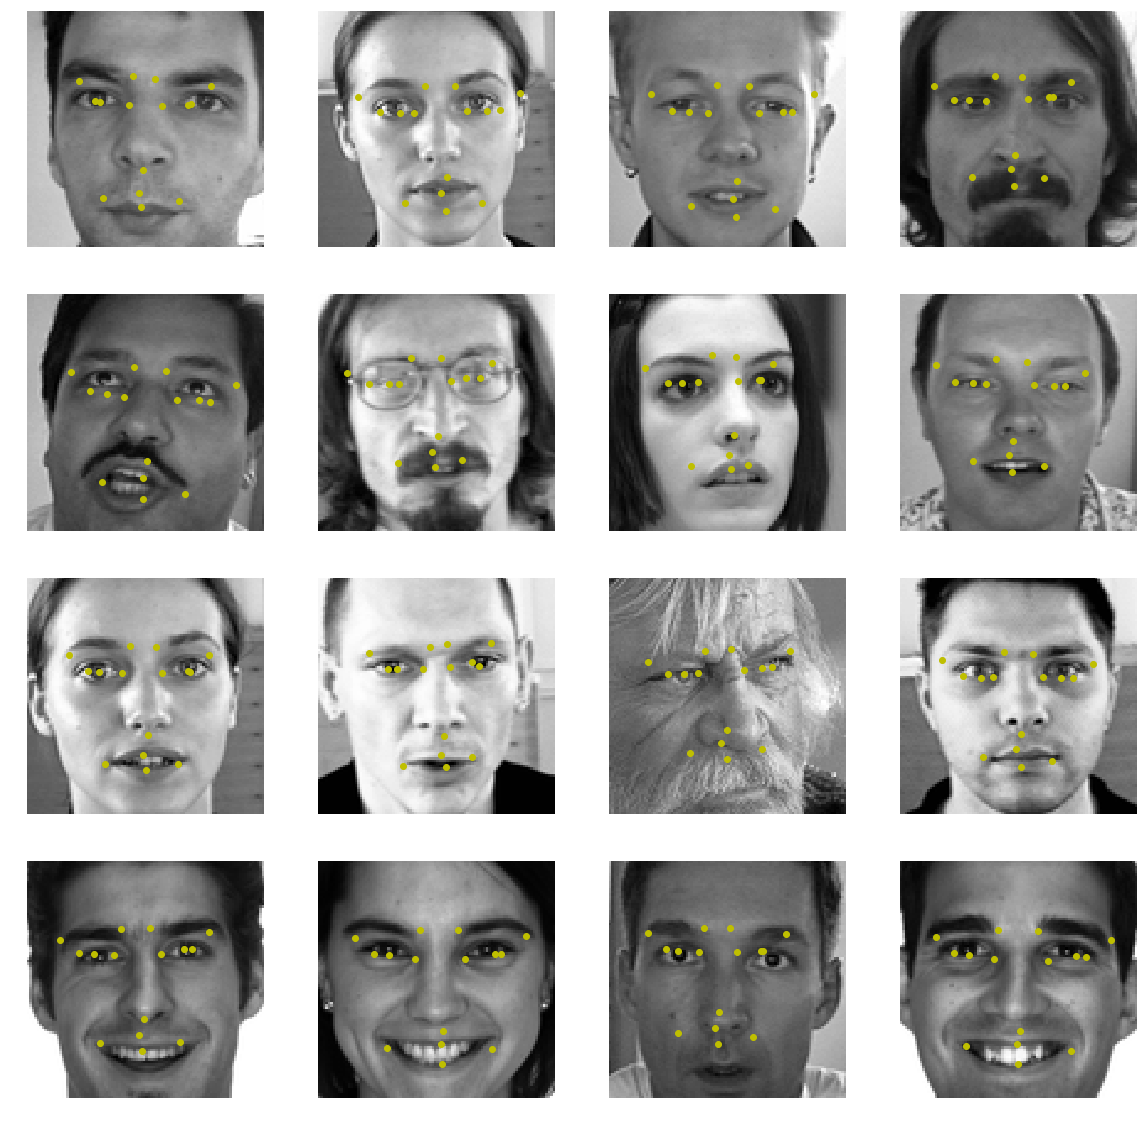

In [42]:
#we plot the prediction with facial images

def plot_faces_with_keypoints_and_predictions(model, nrows=4, ncols=4, model_input='flat'):
    """Plots sampled faces with their predicted labels."""
    selection = np.random.choice(np.arange(X.shape[0]), size=(nrows*ncols), replace=False) #prints a list of random number 
    fig, axes = plt.subplots(figsize=(20, 20), nrows=nrows, ncols=ncols)
    for ind, ax in zip(selection, axes.ravel()):
        img = X_train[ind, :, :, 0]
        if model_input == 'flat':
            predictions = model.predict(img.reshape(1, -1))
        else:
            predictions = model.predict(img[np.newaxis, :, :, np.newaxis])
        xy_predictions=predictions.reshape(15,2)
        ax.imshow(img, cmap='gray')
        ax.plot(xy_predictions[:, 0], xy_predictions[:, 1], 'yo')
        ax.axis('off')
      
plot_faces_with_keypoints_and_predictions(base_model)

Attempt 3
------

* Split the original complete 2140 set into two. One half will be in the augmented, the other half will be left aside. 
* Therefore, 4241 + (2140/2) = 5311 as training; 1070 remaining as validation 

In [43]:
train_orig = np.random.choice(list(hq_image.index), 1070, replace=False)
valid_orig = list(set(hq_image.index) - set(train_orig))

In [44]:
hq_image4 = pd.concat([hq_image3, hq_image2.loc[train_orig,:]])
print(hq_image4.shape) #4241 + 1070 

(5311, 31)


In [45]:
#convert the "image" column to 96x96 images for plotting the data later
X_aug_3 = np.stack([string_image(string) for string in hq_image4['Image']]).astype(np.float)[:, :, :, np.newaxis]
#convert the rest of the data to 2140 lists with 30 key facial keypoint positions
y_aug_3 = np.vstack(hq_image4[hq_image4.columns[:-1]].values)

In [46]:
X_train_aug_3 = X_aug_3 / 255. 

In [47]:
# make a validation set 
hq_image_valid=df_train.loc[valid_orig,:]
print(hq_image_valid.shape)

(1070, 31)


In [48]:
#convert the "image" column to 96x96 images for plotting the data later
X_valid = np.stack([string_image(string) for string in hq_image_valid['Image']]).astype(np.float)[:, :, :, np.newaxis]
#convert the rest of the data to 2140 lists with 30 key facial keypoint positions
y_valid = np.vstack(hq_image_valid[hq_image_valid.columns[:-1]].values)

In [49]:
X_valid_data = X_valid / 255.

In [50]:
base_model = Sequential()#isntantiate a base sequential model
base_model.add(Dense(30, input_dim=9216, activation="relu")) #set the output, input and activation function. 
base_model.add(Dense(30)) #the output has no activation function so it's a regression problem 

In [51]:
start_time=time.time()
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#base_model.compile(optimizer=sgd, loss='mse', metrics=['mse', r_square, rmse])
base_model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse', r_square, rmse])
# Note here: instead of validation_split, we use validation_data 

history = base_model.fit(X_train_aug_3.reshape(y_aug_3.shape[0], -1), y_aug_3, validation_data=(X_valid_data.reshape(y_valid.shape[0],-1), y_valid), shuffle=True, epochs=epochs, batch_size=20)

total_time=time.time()-start_time
print("The model took {} seconds to run".format(round(total_time,3)))


Train on 5311 samples, validate on 1070 samples
Epoch 1/100
5311/5311 [==============================] - 3s 602us/step - loss: 524.3918 - mean_squared_error: 524.3918 - r_square: -0.5520 - rmse: 20.4632 - val_loss: 421.4449 - val_mean_squared_error: 421.4449 - val_r_square: -0.1951 - val_rmse: 20.5050
Epoch 2/100
5311/5311 [==============================] - 2s 455us/step - loss: 193.8960 - mean_squared_error: 193.8960 - r_square: 0.4266 - rmse: 13.8447 - val_loss: 391.6176 - val_mean_squared_error: 391.6176 - val_r_square: -0.1104 - val_rmse: 19.7661
Epoch 3/100
5311/5311 [==============================] - 3s 509us/step - loss: 186.5534 - mean_squared_error: 186.5534 - r_square: 0.4483 - rmse: 13.5845 - val_loss: 402.1728 - val_mean_squared_error: 402.1728 - val_r_square: -0.1398 - val_rmse: 20.0367
Epoch 4/100
5311/5311 [==============================] - 2s 462us/step - loss: 181.5241 - mean_squared_error: 181.5241 - r_square: 0.4630 - rmse: 13.4009 - val_loss: 386.8115 - val_mean_squ

Epoch 66/100
5311/5311 [==============================] - 2s 458us/step - loss: 63.3590 - mean_squared_error: 63.3590 - r_square: 0.8127 - rmse: 7.8630 - val_loss: 189.6279 - val_mean_squared_error: 189.6279 - val_r_square: 0.4680 - val_rmse: 13.4610
Epoch 67/100
5311/5311 [==============================] - 2s 453us/step - loss: 61.5395 - mean_squared_error: 61.5395 - r_square: 0.8180 - rmse: 7.7491 - val_loss: 178.0665 - val_mean_squared_error: 178.0665 - val_r_square: 0.5002 - val_rmse: 12.9875
Epoch 68/100
5311/5311 [==============================] - 2s 451us/step - loss: 61.8710 - mean_squared_error: 61.8710 - r_square: 0.8171 - rmse: 7.7613 - val_loss: 152.1956 - val_mean_squared_error: 152.1956 - val_r_square: 0.5729 - val_rmse: 11.9300
Epoch 69/100
5311/5311 [==============================] - 2s 463us/step - loss: 58.9020 - mean_squared_error: 58.9020 - r_square: 0.8260 - rmse: 7.5814 - val_loss: 168.0036 - val_mean_squared_error: 168.0036 - val_r_square: 0.5284 - val_rmse: 12.6

Epoch 99/100
5311/5311 [==============================] - 3s 544us/step - loss: 44.3210 - mean_squared_error: 44.3210 - r_square: 0.8690 - rmse: 6.5325 - val_loss: 149.5782 - val_mean_squared_error: 149.5782 - val_r_square: 0.5806 - val_rmse: 11.7294
Epoch 100/100
5311/5311 [==============================] - 3s 505us/step - loss: 45.0260 - mean_squared_error: 45.0260 - r_square: 0.8671 - rmse: 6.5697 - val_loss: 153.5446 - val_mean_squared_error: 153.5446 - val_r_square: 0.5694 - val_rmse: 11.9855
The model took 261.29 seconds to run


Below are the model performance plots after 100 epoches:


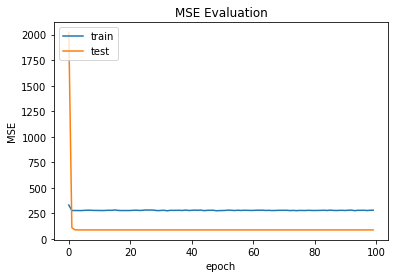

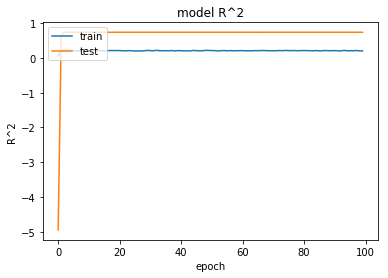

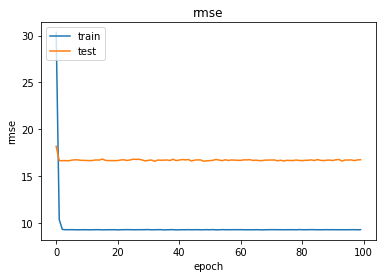

In [41]:
##### 
# BELOW ARE THE NUMBERS WHEN OPTIMIZER = SGD 
##### 

print ("Below are the model performance plots after {} epoches:".format(epochs))


# plot training curve for MSE
#plt.ylim(0,25)
#plt.xlim(0,100)
plt.plot(history.history['val_mean_squared_error'])
plt.plot(history.history['mean_squared_error'])
plt.title('MSE Evaluation')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plot training curve for R^2 (beware of scale, starts very low negative)
#plt.ylim(0.8,1.2)
#plt.xlim(0,100)
plt.plot(history.history['val_r_square'])
plt.plot(history.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
           
# plot training curve for rmse
#plt.ylim(0,8)
#plt.xlim(0,100)
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Below are the ADAM optimizer model performance plots after 100 epoches:


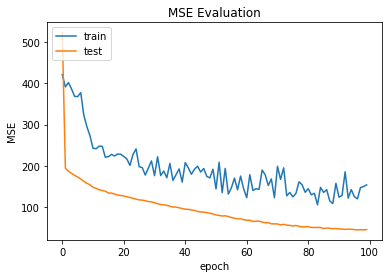

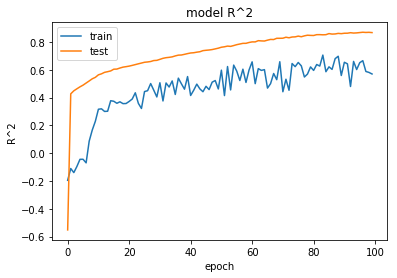

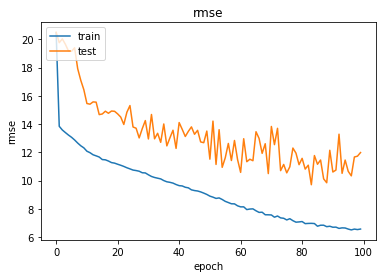

In [52]:
print ("Below are the ADAM optimizer model performance plots after {} epoches:".format(epochs))


# plot training curve for MSE
#plt.ylim(0,25)
#plt.xlim(0,100)
plt.plot(history.history['val_mean_squared_error'])
plt.plot(history.history['mean_squared_error'])
plt.title('MSE Evaluation')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plot training curve for R^2 (beware of scale, starts very low negative)
#plt.ylim(0.8,1.2)
#plt.xlim(0,100)
plt.plot(history.history['val_r_square'])
plt.plot(history.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
           
# plot training curve for rmse
#plt.ylim(0,8)
#plt.xlim(0,100)
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

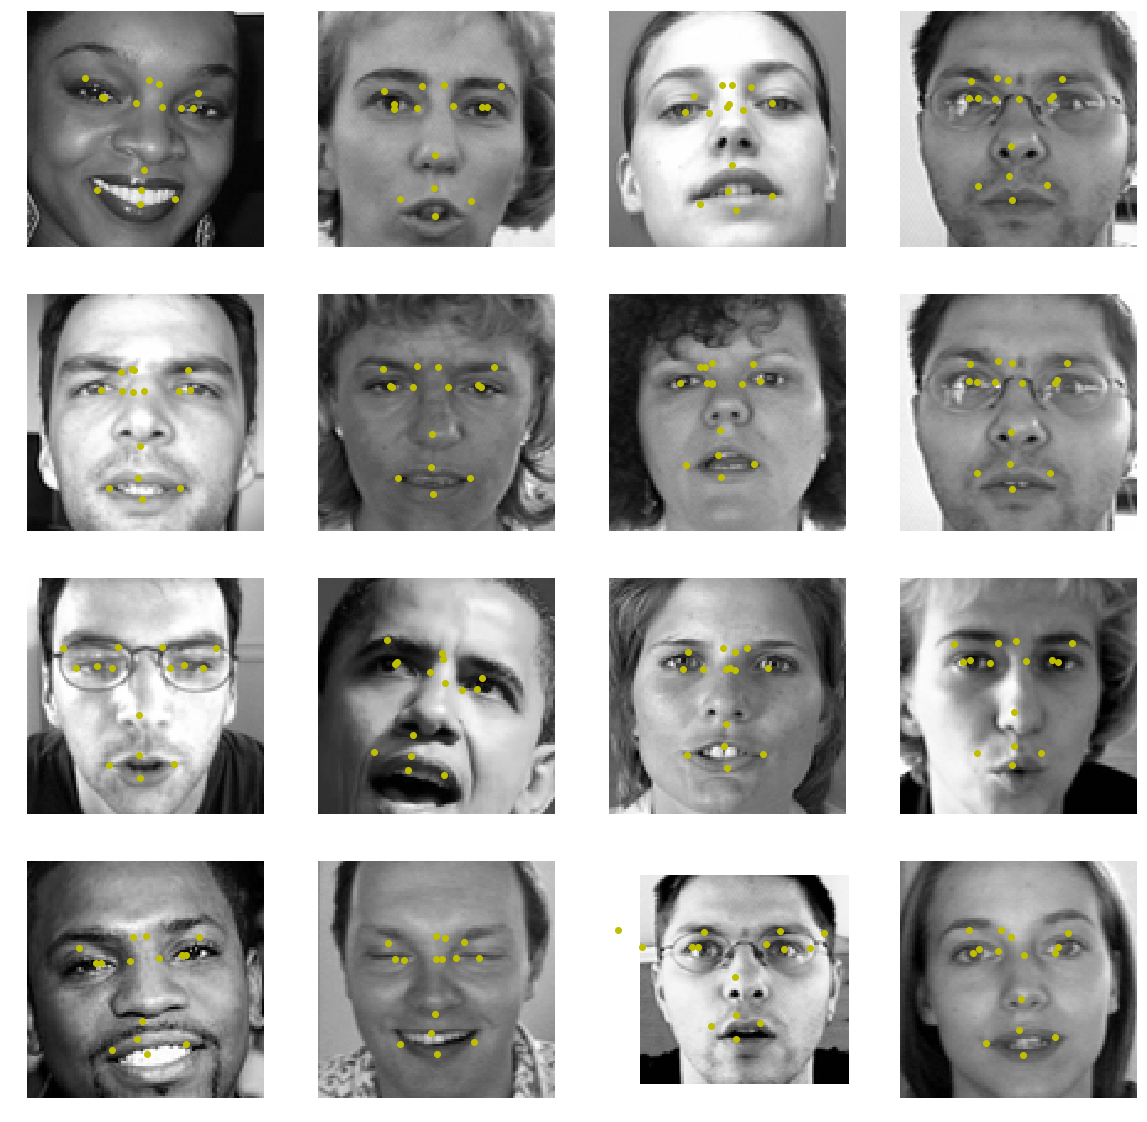

In [53]:
#we plot the prediction with facial images

def plot_faces_with_keypoints_and_predictions(model, nrows=4, ncols=4, model_input='flat'):
    """Plots sampled faces with their predicted labels."""
    selection = np.random.choice(np.arange(X.shape[0]), size=(nrows*ncols), replace=False) #prints a list of random number 
    fig, axes = plt.subplots(figsize=(20, 20), nrows=nrows, ncols=ncols)
    for ind, ax in zip(selection, axes.ravel()):
        img = X_train[ind, :, :, 0]
        if model_input == 'flat':
            predictions = model.predict(img.reshape(1, -1))
        else:
            predictions = model.predict(img[np.newaxis, :, :, np.newaxis])
        xy_predictions=predictions.reshape(15,2)
        ax.imshow(img, cmap='gray')
        ax.plot(xy_predictions[:, 0], xy_predictions[:, 1], 'yo')
        ax.axis('off')
      
plot_faces_with_keypoints_and_predictions(base_model)

Attempt 4 (last ditch effort)
------ 
* train on entire augmented set and just see how bad things go 

In [54]:
base_model = Sequential()#isntantiate a base sequential model
base_model.add(Dense(30, input_dim=9216, activation="relu")) #set the output, input and activation function. 
base_model.add(Dense(30)) #the output has no activation function so it's a regression problem 

In [55]:
start_time=time.time()
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#base_model.compile(optimizer=sgd, loss='mse', metrics=['mse', r_square, rmse])
base_model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse', r_square, rmse])

epochs = 100
history = base_model.fit(X_train_aug.reshape(y_aug.shape[0], -1), y_aug, validation_split=0.2, shuffle=True, epochs=epochs, batch_size=20)

total_time=time.time()-start_time
print("The model took {} seconds to run".format(round(total_time,3)))

Train on 5104 samples, validate on 1277 samples
Epoch 1/100
5104/5104 [==============================] - 3s 618us/step - loss: 413.6040 - mean_squared_error: 413.6040 - r_square: -0.2176 - rmse: 18.8662 - val_loss: 203.2461 - val_mean_squared_error: 203.2461 - val_r_square: 0.3973 - val_rmse: 14.1915
Epoch 2/100
5104/5104 [==============================] - 2s 450us/step - loss: 219.4526 - mean_squared_error: 219.4526 - r_square: 0.3566 - rmse: 14.7651 - val_loss: 188.6087 - val_mean_squared_error: 188.6087 - val_r_square: 0.4408 - val_rmse: 13.6602
Epoch 3/100
5104/5104 [==============================] - 2s 472us/step - loss: 200.8966 - mean_squared_error: 200.8966 - r_square: 0.4116 - rmse: 14.1164 - val_loss: 150.9794 - val_mean_squared_error: 150.9794 - val_r_square: 0.5523 - val_rmse: 12.1800
Epoch 4/100
5104/5104 [==============================] - 2s 480us/step - loss: 185.6143 - mean_squared_error: 185.6143 - r_square: 0.4561 - rmse: 13.5677 - val_loss: 167.5250 - val_mean_square

Epoch 66/100
5104/5104 [==============================] - 2s 427us/step - loss: 64.6466 - mean_squared_error: 64.6466 - r_square: 0.8108 - rmse: 7.9685 - val_loss: 75.4977 - val_mean_squared_error: 75.4977 - val_r_square: 0.7770 - val_rmse: 8.6018
Epoch 67/100
5104/5104 [==============================] - 2s 440us/step - loss: 63.4959 - mean_squared_error: 63.4959 - r_square: 0.8141 - rmse: 7.8984 - val_loss: 80.0725 - val_mean_squared_error: 80.0725 - val_r_square: 0.7635 - val_rmse: 8.8642
Epoch 68/100
5104/5104 [==============================] - 2s 468us/step - loss: 63.9767 - mean_squared_error: 63.9767 - r_square: 0.8125 - rmse: 7.9182 - val_loss: 73.7832 - val_mean_squared_error: 73.7832 - val_r_square: 0.7821 - val_rmse: 8.4940
Epoch 69/100
5104/5104 [==============================] - 2s 424us/step - loss: 62.6342 - mean_squared_error: 62.6342 - r_square: 0.8167 - rmse: 7.8444 - val_loss: 87.8058 - val_mean_squared_error: 87.8058 - val_r_square: 0.7404 - val_rmse: 9.3029
Epoch 70

5104/5104 [==============================] - 2s 470us/step - loss: 51.3018 - mean_squared_error: 51.3018 - r_square: 0.8500 - rmse: 7.0670 - val_loss: 90.5034 - val_mean_squared_error: 90.5034 - val_r_square: 0.7326 - val_rmse: 9.4602
Epoch 100/100
5104/5104 [==============================] - 2s 483us/step - loss: 50.7497 - mean_squared_error: 50.7497 - r_square: 0.8513 - rmse: 7.0436 - val_loss: 59.5270 - val_mean_squared_error: 59.5270 - val_r_square: 0.8244 - val_rmse: 7.6369
The model took 263.161 seconds to run


Below are the model performance plots after 100 epoches:


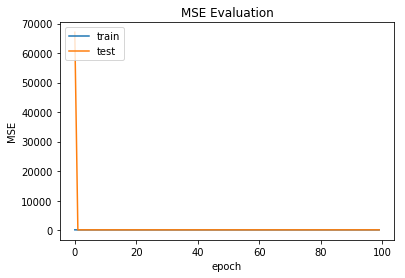

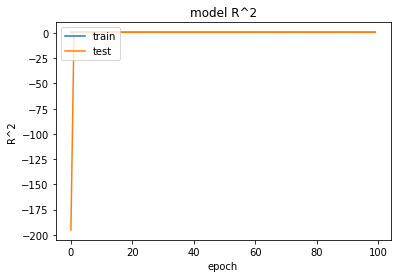

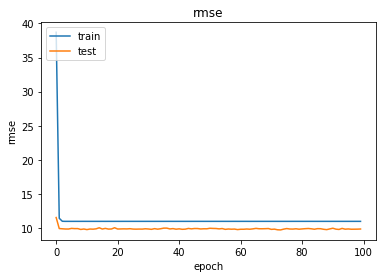

In [45]:
#######
# THESE ARE THE NUMBERS WHEN OPTIMIZER = SGD 
####### 

print ("Below are the model performance plots after {} epoches:".format(epochs))


# plot training curve for MSE
#plt.ylim(0,25)
#plt.xlim(0,100)
plt.plot(history.history['val_mean_squared_error'])
plt.plot(history.history['mean_squared_error'])
plt.title('MSE Evaluation')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plot training curve for R^2 (beware of scale, starts very low negative)
#plt.ylim(0.8,1.2)
#plt.xlim(0,100)
plt.plot(history.history['val_r_square'])
plt.plot(history.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
           
# plot training curve for rmse
#plt.ylim(0,8)
#plt.xlim(0,100)
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Below are the ADAM optimizer model performance plots after 100 epoches:


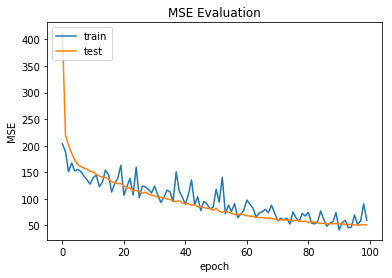

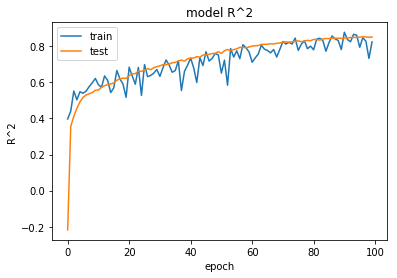

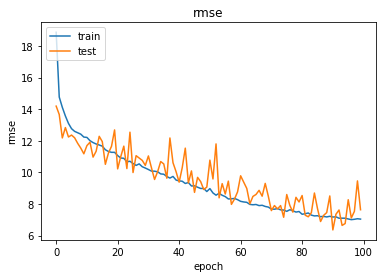

In [56]:
print ("Below are the ADAM optimizer model performance plots after {} epoches:".format(epochs))


# plot training curve for MSE
#plt.ylim(0,25)
#plt.xlim(0,100)
plt.plot(history.history['val_mean_squared_error'])
plt.plot(history.history['mean_squared_error'])
plt.title('MSE Evaluation')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plot training curve for R^2 (beware of scale, starts very low negative)
#plt.ylim(0.8,1.2)
#plt.xlim(0,100)
plt.plot(history.history['val_r_square'])
plt.plot(history.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
           
# plot training curve for rmse
#plt.ylim(0,8)
#plt.xlim(0,100)
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

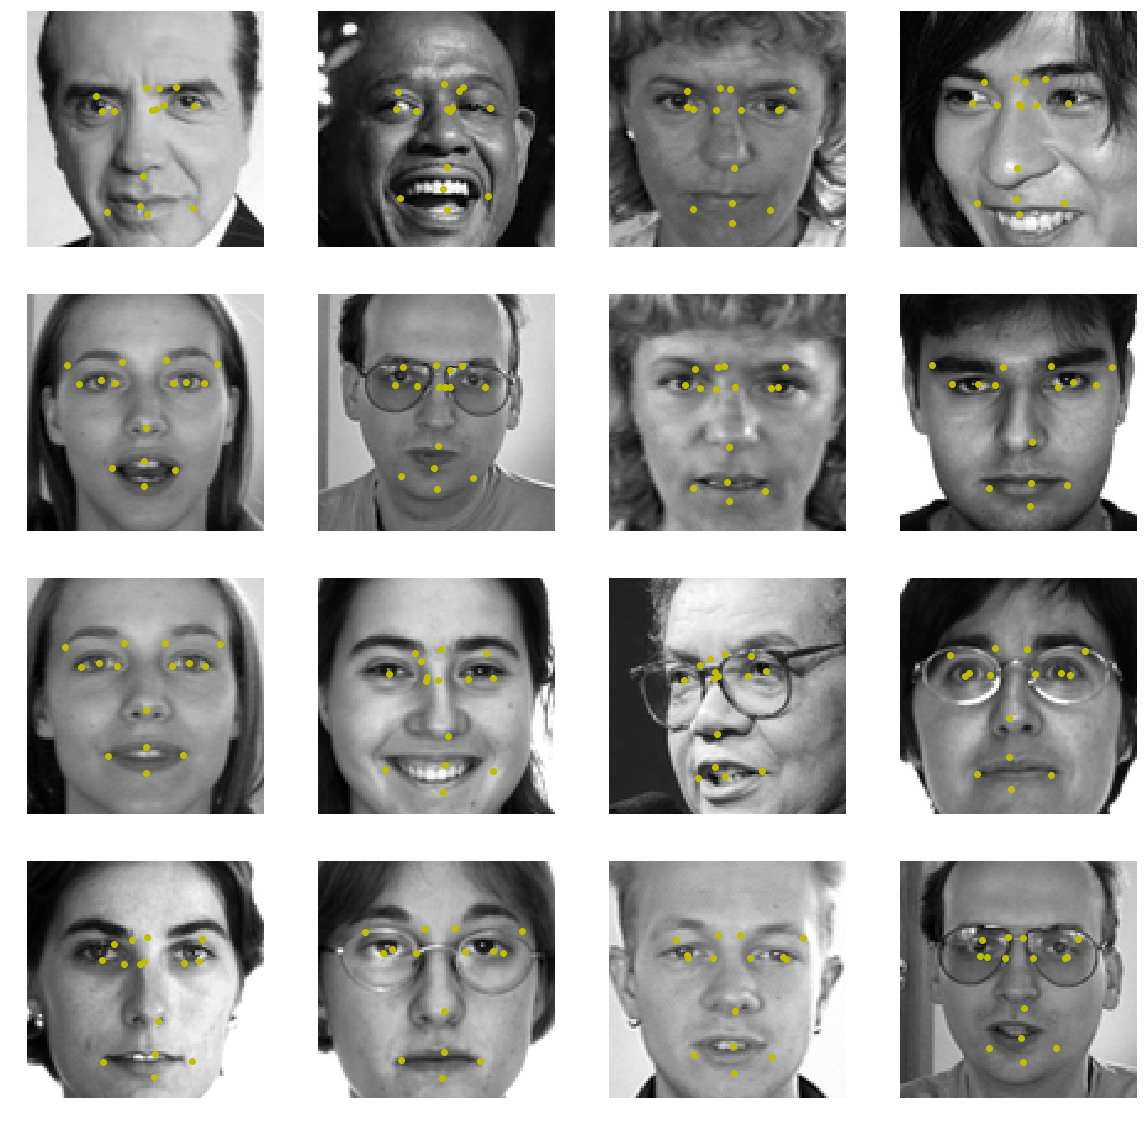

In [57]:
#we plot the prediction with facial images

def plot_faces_with_keypoints_and_predictions(model, nrows=4, ncols=4, model_input='flat'):
    """Plots sampled faces with their predicted labels."""
    selection = np.random.choice(np.arange(X.shape[0]), size=(nrows*ncols), replace=False) #prints a list of random number 
    fig, axes = plt.subplots(figsize=(20, 20), nrows=nrows, ncols=ncols)
    for ind, ax in zip(selection, axes.ravel()):
        img = X_train[ind, :, :, 0]
        if model_input == 'flat':
            predictions = model.predict(img.reshape(1, -1))
        else:
            predictions = model.predict(img[np.newaxis, :, :, np.newaxis])
        xy_predictions=predictions.reshape(15,2)
        ax.imshow(img, cmap='gray')
        ax.plot(xy_predictions[:, 0], xy_predictions[:, 1], 'yo')
        ax.axis('off')
      
plot_faces_with_keypoints_and_predictions(base_model)